## Analysis of algorithms that make exact recovery of the cluster structure in GBM
Model description is [here](https://arxiv.org/pdf/1709.05510.pdf)

Candidate algorithms are: 
1. Motif-counting algorithm (from the above paper)
2. Spectral clustering

Last update: 26/09/2019

### This notebook uses the classes.py file where principal classes and functions are defined

File classes.py is on autoreload

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
import seaborn as sns
from classes_v2 import eigenvectorAnalysis, GBM_graph, Spectral_Clustering, Spectral_k_means, Spectral_Clustering_choice,k_means_analysis, Spectral_Clustering_analysis, Motif_Counting, Motif_Counting_New, Clique_Partitioning, Partition, simulation, full_simulation, full_simulation2, khren, khren2, khren3, max_neighbourhood, cmn_nbr_ssl_algo, Common_neigbours_labeling
import tqdm
import time 
import warnings
import copy
warnings.filterwarnings("ignore")
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [121]:
s = simulation(Spectral_k_means, n_1 = 8000, n_2 = 8000, a = 10, b = 5, n_trials = 1)

[145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155]
Total accuracy after k-means = 0.508
Took 11 vectors
metric_min = 16


In [122]:
s['accuracy']

0.5078750000000001

In [123]:
G = s['graphs'][0]

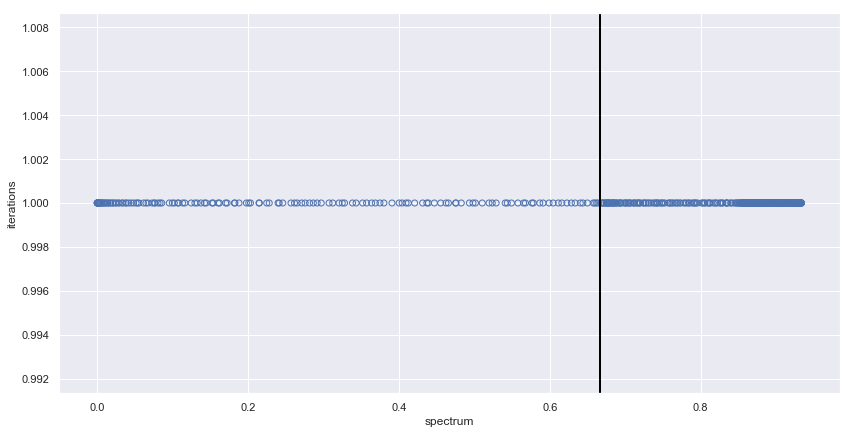

Total accuracy after k-means = 0.502


In [124]:
kma0 = k_means_analysis(G, portion = 0.03, spectrum_disp = True)

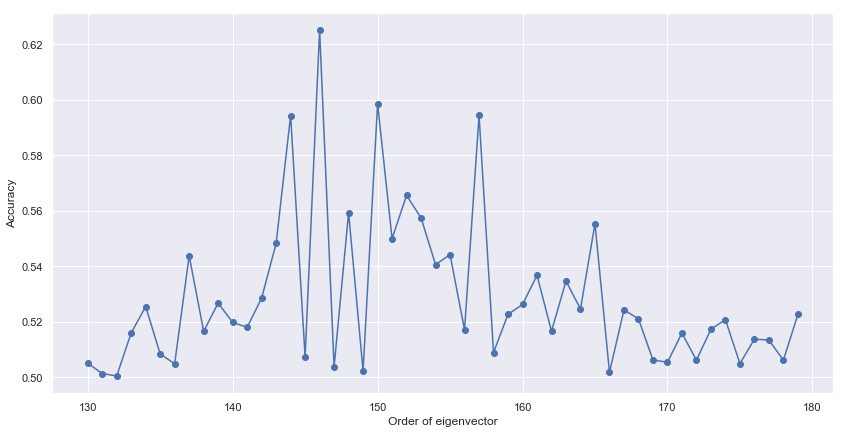

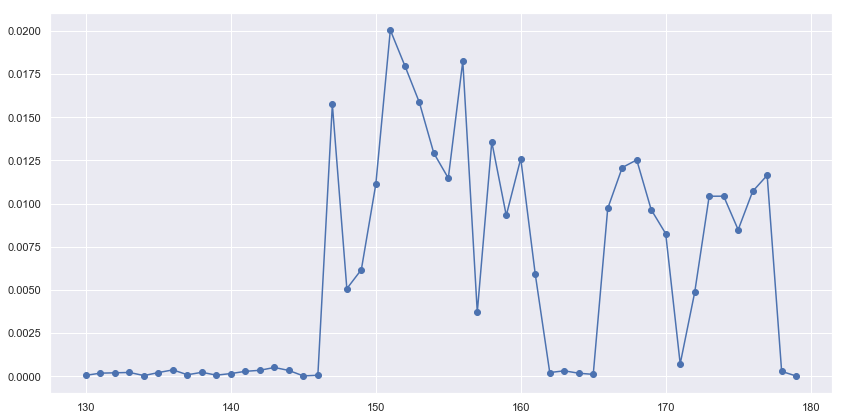

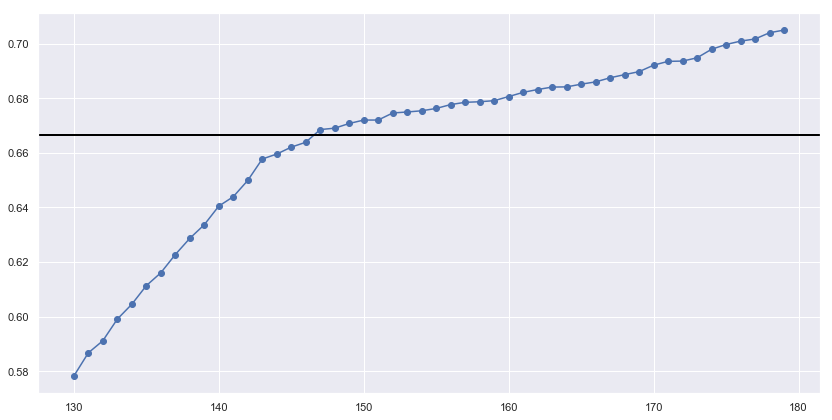

Total accuracy after k-means = 0.649


In [129]:
kma1 = k_means_analysis(G, portion = 0.015, vectors = [i for i in range(130, 180)], c_norm_disp = True)

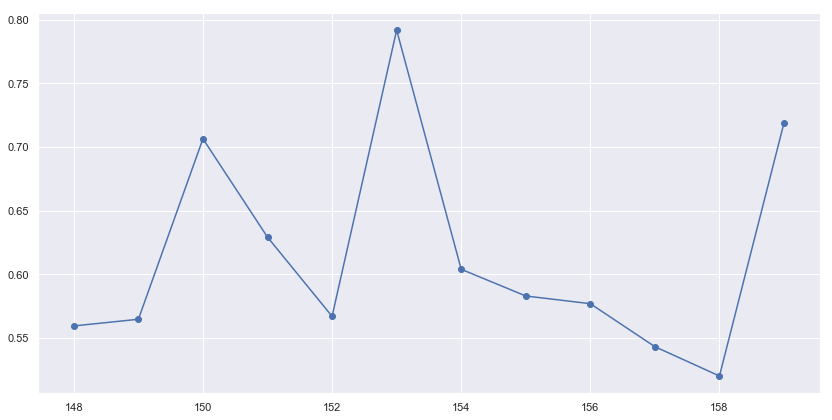

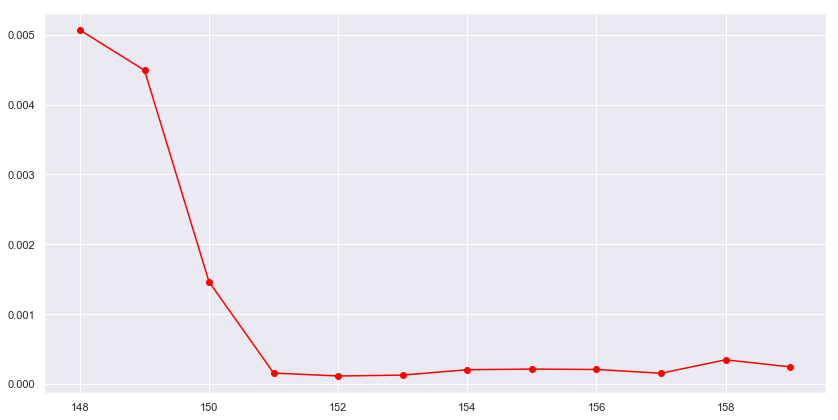

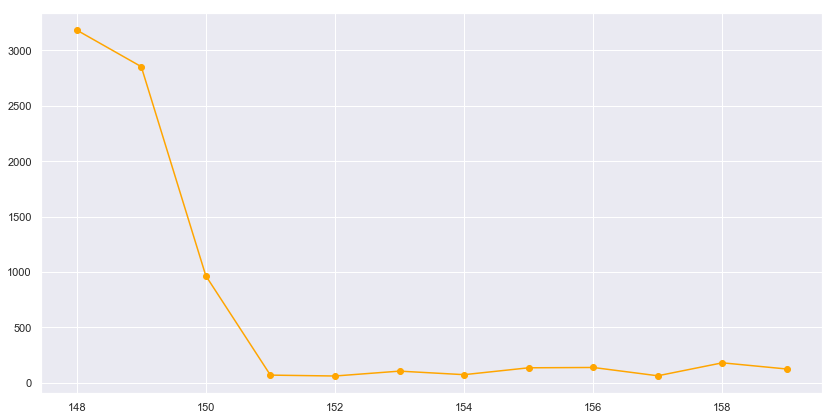

Total accuracy after k-means = 0.719


In [127]:
kma2 = k_means_analysis(G, portion = 0.015, vectors = [i for i in range(148, 160)], k = 13)

In [ ]:
fs5_500 = full_simulation([Spectral_k_means], n_1 = 500, n_2 = 500, a_start = 10, a_finish = 21, a_step = 1, b = 5, n_trials = 10)

In [ ]:
fs5_1000 = full_simulation([Spectral_k_means], n_1 = 1000, n_2 = 1000, a_start = 10, a_finish = 21, a_step = 1, b = 5, n_trials = 10)

In [2]:
fs5_1500 = full_simulation([Spectral_k_means], n_1 = 1500, n_2 = 1500, a_start = 10, a_finish = 21, a_step = 1, b = 5, n_trials = 10)

a = 10, b = 5, Spectral_k_means = 87.0% (38sec), 
a = 11, b = 5, Spectral_k_means = 82.0% (46sec), 
a = 12, b = 5, Spectral_k_means = 94.0% (53sec), 


KeyboardInterrupt: 

In [2]:
fs5_2500 = full_simulation([Spectral_k_means], n_1 = 2500, n_2 = 2500, a_start = 10, a_finish = 21, a_step = 1, b = 5, n_trials = 10)

a = 10, b = 5, Spectral_k_means = 74.0% (74sec), 
a = 11, b = 5, Spectral_k_means = 65.0% (98sec), 


KeyboardInterrupt: 

In [ ]:
a_array = np.arange(10, 21, 1)
plt.plot(a_array, [x.get('Spectral_k_means') for x in fs5_500])
plt.plot(a_array, [x.get('Spectral_k_means') for x in fs5_1000])
plt.plot(a_array, [x.get('Spectral_k_means') for x in fs5_1500])
plt.legend(['n = 1000', 'n = 2000', "n = 3000"])
plt.xlabel('$a$')
plt.ylabel('$accuracy$')
plt.grid(True)
plt.title("Accuracy evolution without cheating for $b = 5$")
plt.savefig("Andrei_b_5_SC_k_means_without_cheating.png")
plt.show()

In [ ]:
a_array = np.arange(10, 21, 1)
plt.plot(a_array, [x.get('Spectral_k_means') for x in fs5_500])
plt.plot(a_array, [x.get('Spectral_k_means') for x in fs5_1000])
# plt.plot(a_array, [x.get('Spectral_k_means') for x in fs5_1500])
plt.legend(['n = 1000', 'n = 2000'])
plt.xlabel('$a$')
plt.ylabel('$accuracy$')
plt.grid(True)
plt.title("Accuracy evolution without cheating for $b = 5$")
plt.savefig("Andrei_b_5_SC_k_means_without_cheating_v2.png")
plt.show()